In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the dataset with pandas 
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Create an X array
X = mall_data.iloc[:, [3,4]].values

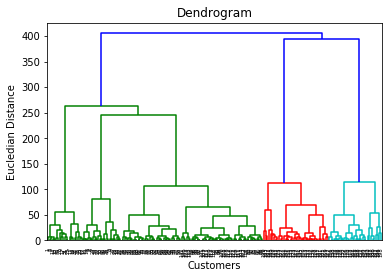

In [4]:
#Using Dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X, method= 'ward')) 
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.show()

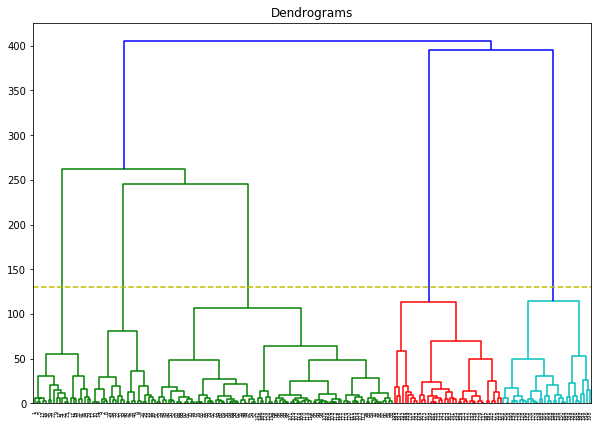

In [6]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=130, color='y', linestyle='--')
plt.show()

In [7]:
#Fitting hierarchial clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [8]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [11]:
#Customer ID and Clusters
customer_id = mall_data.iloc[:, 0].values
customer_id

data = pd.DataFrame({'Customer ID': customer_id.flatten(), 'Clusters': y_hc.flatten()})
data.head(10)

,Customer ID,Clusters
0,1,4
1,2,3
2,3,4
3,4,3
4,5,4
5,6,3
6,7,4
7,8,3
8,9,4
9,10,3


In [13]:
data.tail(10)

,Customer ID,Clusters
190,191,0
191,192,2
192,193,0
193,194,2
194,195,0
195,196,2
196,197,0
197,198,2
198,199,0
199,200,2


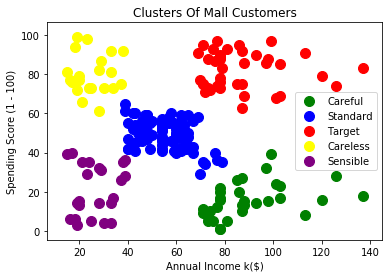

In [14]:
#Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'red', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'purple', label = 'Sensible')
plt.title('Clusters Of Mall Customers')
plt.xlabel('Annual Income k($)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()